# **Analysing Yield Drivers in Crop Production using Machine Learning and Exploratory Data Analysis**


---



**1. Data Loading and Exploration**

**2. Data Cleaning**

**2. Exploratory Data Analysis and Visualization**
- Heatmap
- Analysis of State name feature
- Analysis of Crop year feature
- Analysis of Season feature
- Analysis of Crop feature

**3. Data Preprocessing**
- Label Encoding
- Principal Component Analysis
- Dataset Splitting

**4. Algorithms**

- Ridge Regression
- Decision Tree Regressor
- Random Forest Regressor
- Artificial Neural Network

**5. Comparative Analysis**


---


**Dataset link:** https://www.kaggle.com/datasets/abhinand05/crop-production-in-india


Importing python packages and libraries that will be used during the analysis of the data.

In [ ]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from scipy.stats import uniform

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Loading and Exploration

In [ ]:
# Loading the crop production Data
df = pd.read_csv('crop_production.csv')

In [ ]:
# Viewing the crop production dataset 
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


- The dataset consists of 246,091 observations with 7 attributes including state names, district names, crop years, seasons, crop types, cropped areas, and crop production figures.

In [ ]:
# column names present in the dataset
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [ ]:
# dimensions of the dataset
df.shape

(246091, 7)

- The dataset selected for analysis comprises 246091 entries and 7 features, out of which 6 serve as input attributes while the remaining attribute represents the target variable used to determine the crop production.


In [ ]:
# size of the crop production dataset
df.size

1722637

In [ ]:
# Overview of the Dataset with its properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


- This data has a total of 7 columns which include State Name, District Name, Crop Year, Season, Crop, Area and Production. 
- There are 246,091 non-null values in each of the first six columns, while the last column have 242,361 non-null values respectively.






In [ ]:
# checking the missing values in the dataset
df.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

- There are 3730 missing values in production feature while rest features have no missing values in them. 
- Therefore, there is a need to work on production feature to remove missing values.

In [ ]:
# Descriptive statistics for numerical columns of the dataset
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


- The dataset's numerical columns have been summarized statistically, presenting the count, mean, standard deviation, minimum and maximum values, and quartiles (25%, 50%, 75%) for each numerical feature in the dataset.






# Data Cleaning

In [ ]:
# Replacing production feature missing values (null values) with 0
df['Production'].replace(np.nan,0,inplace = True)

- Production feature missing values are replaced by 0. 
- Now there will not be any missing value in data.

In [ ]:
# Again checking missing values in he dataset
df.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

- The summary shows that there are no missing or invalid values in any of the attributes of the diabetes dataset. 
- This suggests that the dataset is complete, and there is no need to handle any missing data before proceeding with the analysis.






In [ ]:
# Dimensions of crop production dataset
df.shape

(246091, 7)

In [ ]:
# Viewing forst five rows of the dataset
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
# Count of unique values in each column of the dataset
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]
pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
State_Name,33
District_Name,646
Crop_Year,19
Season,6
Crop,124
Area,38442
Production,51627


- The above information displays the number of unique values for each column in the dataset. 
- The "State_Name" column has 33 unique values, the "District_Name" column has 646 unique values, the "Crop_Year" column has 19 unique values, the "Season" column has 6 unique values, the "Crop" column has 124 unique values, the "Area" column has 38442 unique values, and the "Production" column has 51627 unique values.






In [ ]:
# Descriptive statistics for numerical columns of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,246091.0,2005.643018,4.952164e+00,1997.00,2002.0,2006.0,2010.0,2.015000e+03
Area,246091.0,12002.820864,5.052340e+04,0.04,80.0,582.0,4392.0,8.580100e+06
Production,246091.0,573674.440623,1.693614e+07,0.00,77.0,691.0,6769.0,1.250800e+09


# Exploratory Data Analysis and Visualization

## Heatmap

<Axes: >

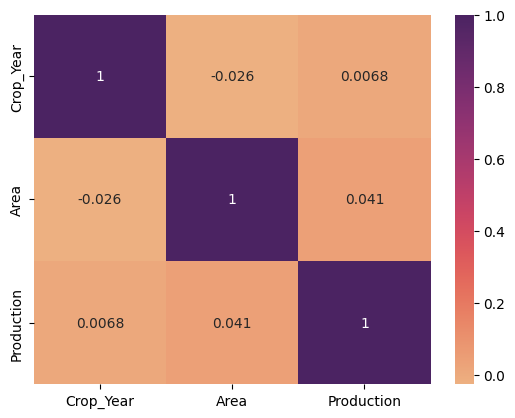

In [ ]:
# Heatmap showing correlation in between features
corr = df.corr()
sns.heatmap(corr,annot=True, cmap='flare')

- The figure is showing the heatmap that is displaying the correlations between features. 
- A high correlation is found between the following features. 
- Production and crop year, and Production and area.

## Analysis of State Name

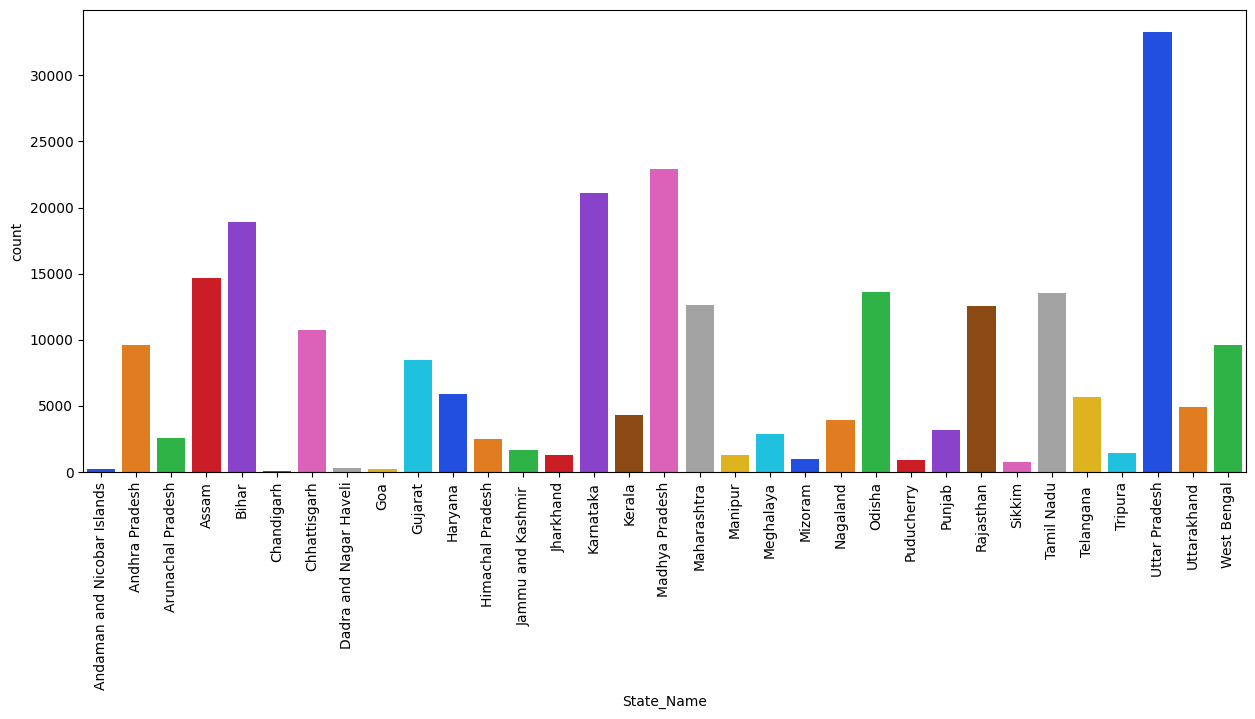

In [ ]:
plt.figure(figsize=(15,6))

# Countplot for State name feature
sns.countplot(x='State_Name', data=df,palette='bright')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Display the plot
plt.show()

- Figure shows the count of each class present in the state name feature. 
- There are a total of 33 classes in this feature. 
- The count of Uttar Pradesh is 33306 (highest), Madhya Pradesh is 22943, Karnataka is 21122, Bihar is 18885, Assam is 14628, Odisha is 13575, Tamil Nadu is 13547, Maharashtra is 12628, etc. 
- The lowest count state is Chandigarh with a value of 60. 

<ipython-input-18-602b36db152b>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="State_Name",y="Production",data=df,palette='bright')


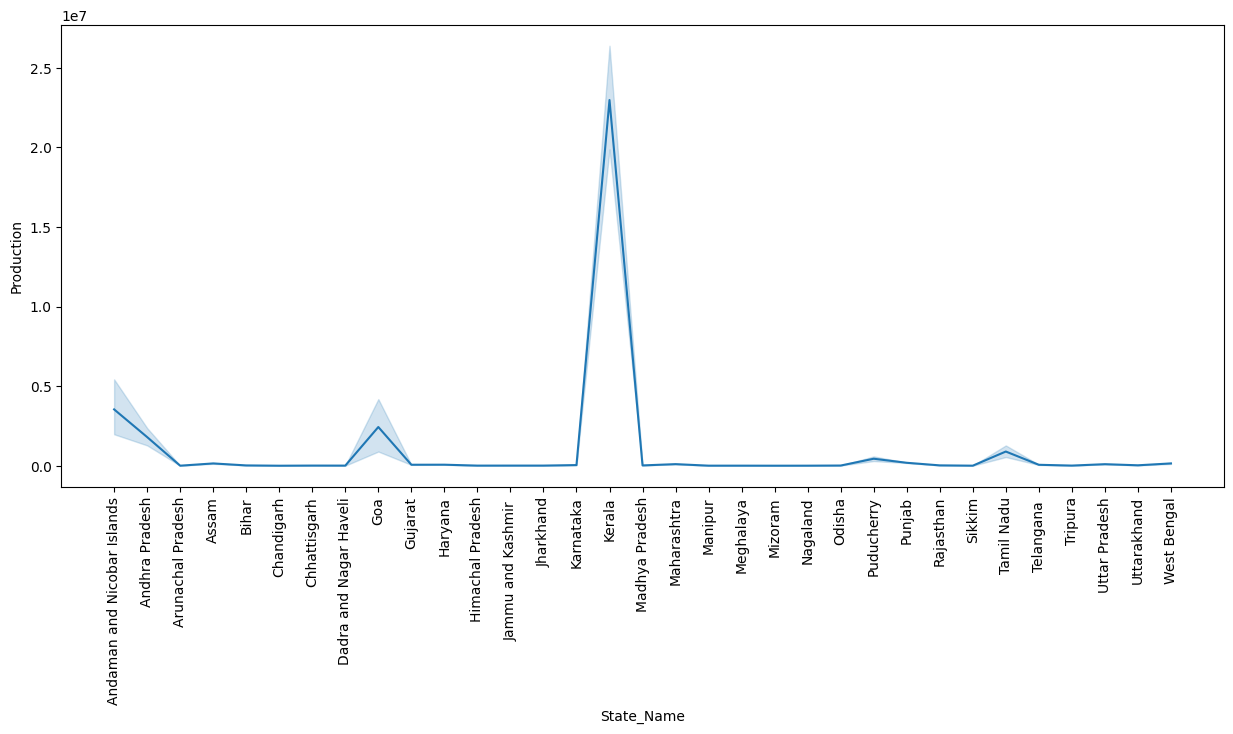

In [ ]:
plt.figure(figsize=(15,6))

# lineplot for state name and production feature
sns.lineplot(x="State_Name",y="Production",data=df,palette='bright')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Display the plot
plt.show()

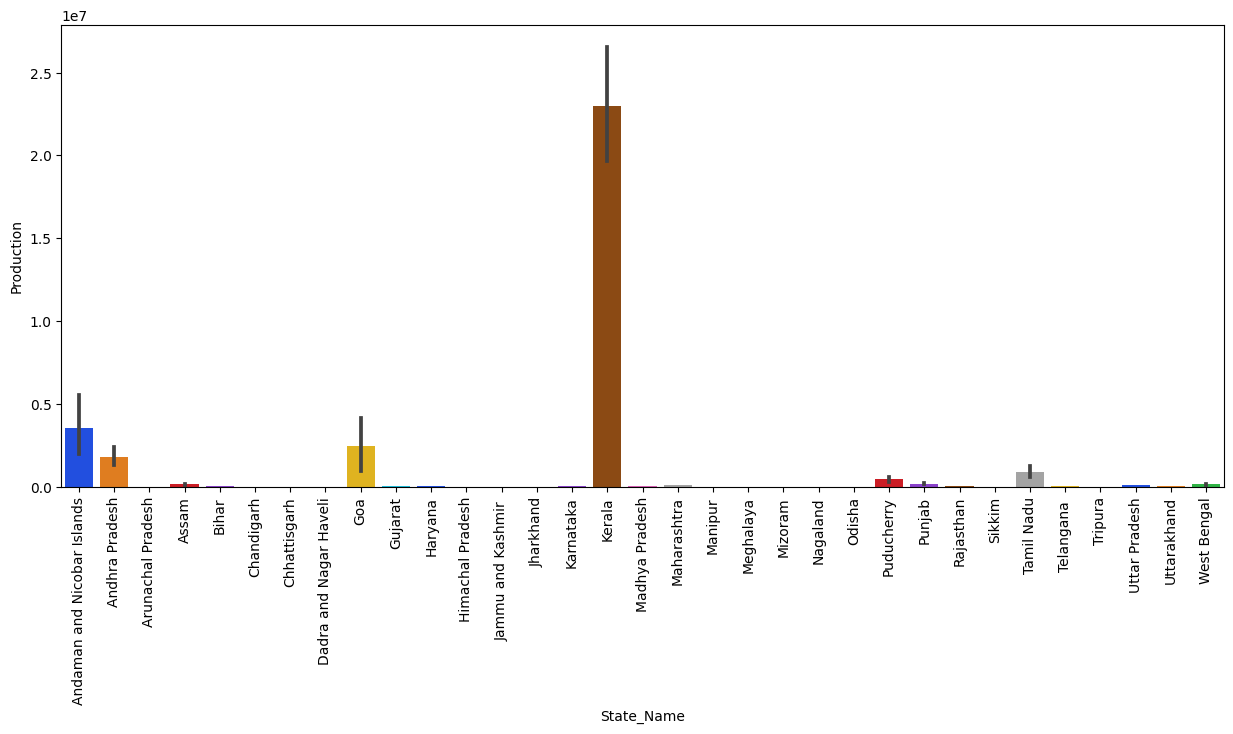

In [ ]:
plt.figure(figsize=(15,6))

# Create a barplot of production by state name
sns.barplot(x="State_Name", y="Production", data=df,palette='bright')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Display the plot
plt.show()

- The given lineplot and barplot illustrates the crop production rates of various Indian states between 1997 and 2015. 
- Kerala stands out as having a significantly higher production rate than other states. 
- Conversely, some states such as Bihar, Chhattisgarh, Jharkhand, Himachal Pradesh, Jammu and Kashmir, and many northeastern states have considerably lower crop production rates, which can be excluded from the analysis. 
- Also, it is worth noting that most coastal states have higher production rates, possibly due to their cultivation of coastal crops.



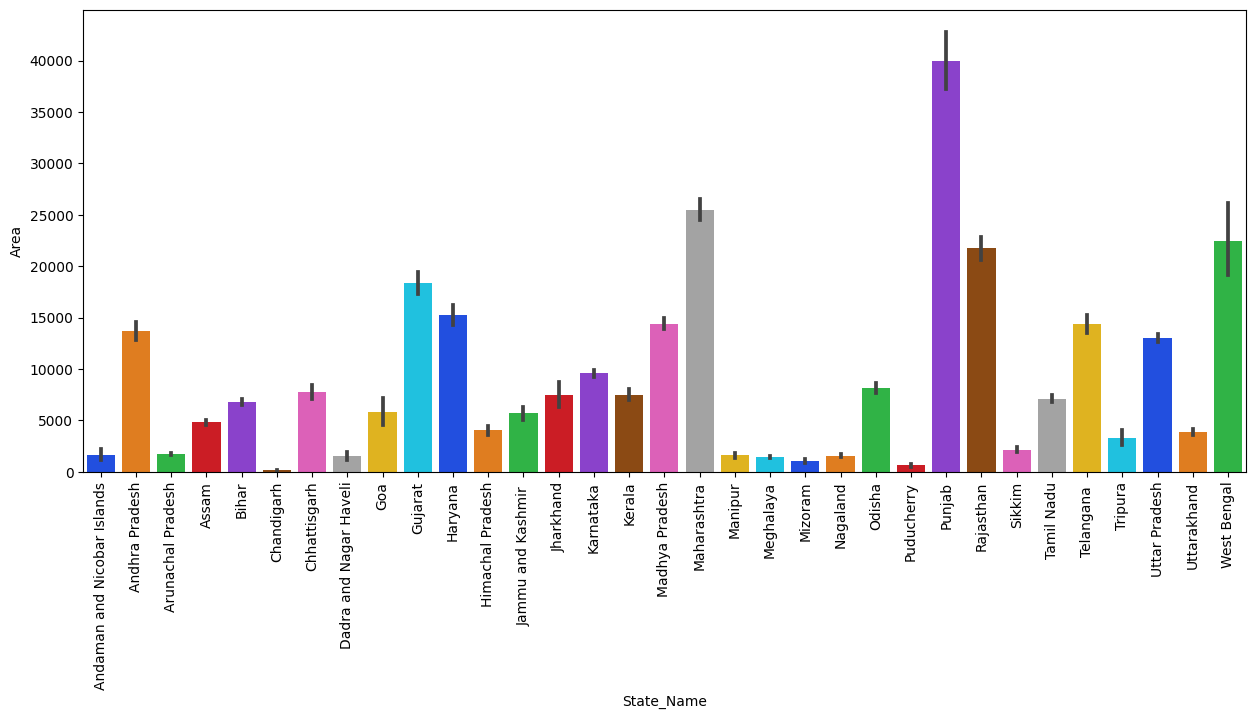

In [ ]:
plt.figure(figsize=(15,6))

# Create a barplot of area by state name 
sns.barplot(x="State_Name", y="Area", data=df,palette='bright')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Display the plot
plt.show()

- The provided visualization showcases the distribution of agricultural land across various states. 
- It can be deduced that Punjab has the largest agricultural land area, followed by Maharashtra and West Bengal in second and third place, respectively. 
- Chandigarh has the smallest agricultural land area among the states depicted in the visualization.






## Analysis of Crop year

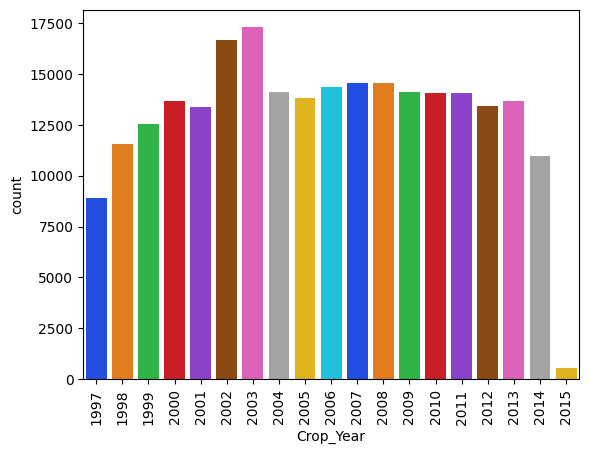

In [ ]:
# Countplot for State name feature
sns.countplot(x='Crop_Year', data=df,palette='bright')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Display the plot
plt.show()

- The given figure depicts the production of various crops in a particular year, based on a dataset spanning from 1997 to 2015. 
- It is noticeable that there was an increase in the diversity of crops produced from 1997 to 2003, followed by a decline in subsequent years. 
- Also, the year 2015 witnessed a significant drop in the number of crop varieties produced, suggesting that some unforeseen events or policy changes may have occurred during that period.






<ipython-input-22-03849707fd45>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Crop_Year",y="Production",data=df,palette='bright')


<Axes: xlabel='Crop_Year', ylabel='Production'>

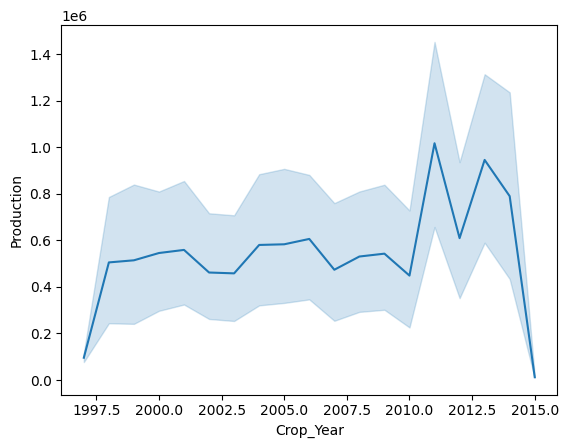

In [ ]:
# lineplot between crop year and production feature
sns.lineplot(x="Crop_Year",y="Production",data=df,palette='bright')

<Axes: xlabel='Crop_Year', ylabel='Production'>

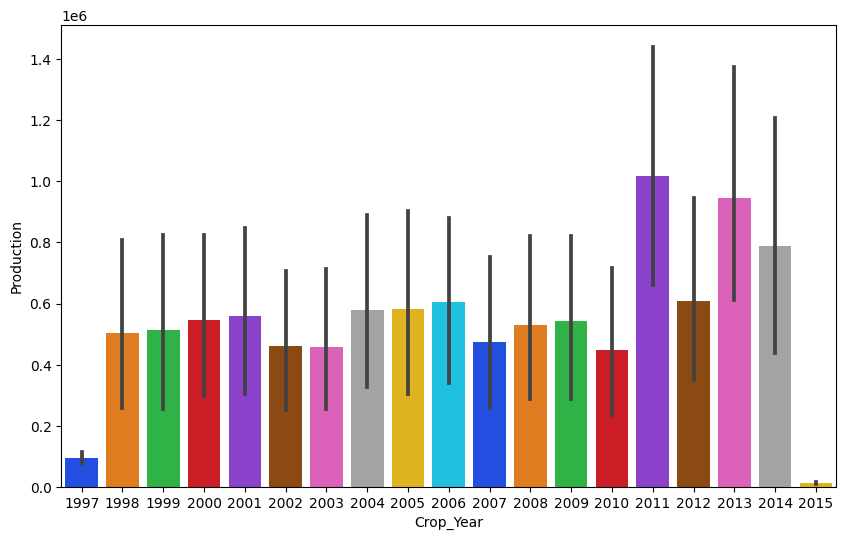

In [ ]:
plt.figure(figsize=(10,6))

# barplot between crop year and production feature
sns.barplot(x="Crop_Year",y="Production",data=df,palette='bright')

- The  line plot and bar plots depict the production rates of crops in different years. 
- The crop production rate was initially low in 1997 but gradually increased to a certain level and remained consistent. 
- Notably, there was a significant spike in crop production in 2011, which continued until 2014. 
- However, in 2015, there was a considerable decline in crop production, which correlates with our previous observation of a drop in the diversity of crops produced during the same year. 
- This suggests that unforeseen events or policy changes may have led to the reduced production of various crops, resulting in a significant decline in the overall crop production rate.





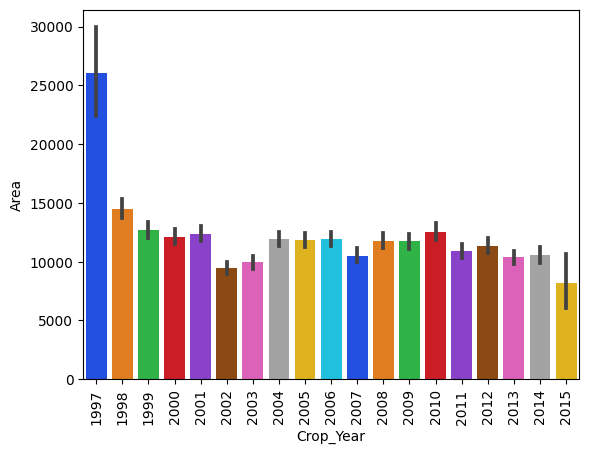

In [ ]:
# Create a barplot of production by state 
sns.barplot(x="Crop_Year", y="Area", data=df,palette='bright')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Display the plot
plt.show()

- The presented visualization displays the agricultural land area over different year intervals. 
- It can be deduced from the visualization that the agricultural land area was at its highest point in the year 1997, after which a significant decline can be observed from the year 2000 onwards. 
- Also, there is a continued decrease in agricultural land area up to the year 2015.






## Analysis of Season

<Axes: xlabel='Season', ylabel='count'>

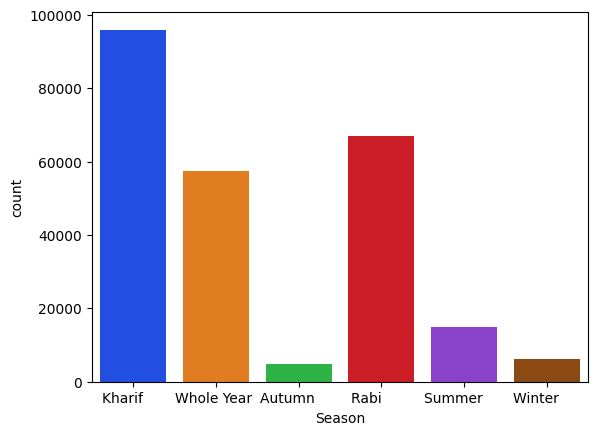

In [ ]:
# Countplot for season feature
sns.countplot(x='Season', data=df,palette='bright')

- The figure depicts the variety of crops produced in different seasons. - The Kharif season has a significantly higher variety of crops compared to other seasons, while Summer, Winter, and Autumn have a very low variety of crops. 
- The Rabi and Whole Year seasons have an average number of various crops produced. 
- This leads us to conclude that the Kharif season is suitable for producing most types of crops, while Summer, Winter, and Autumn are only suitable for some specific crops.






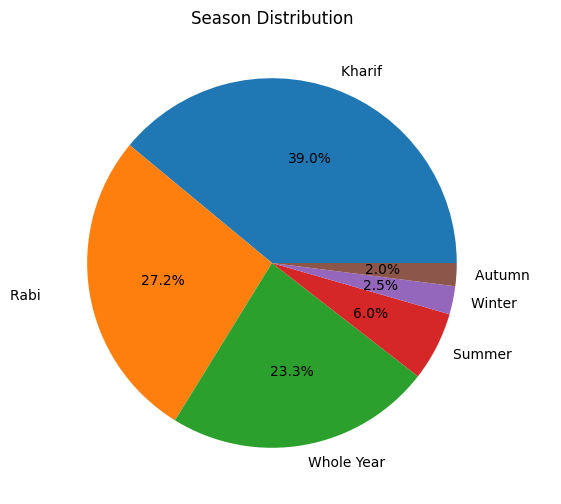

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

# Create a pie chart with a large figure size for season feature
state_counts = df['Season'].value_counts()
ax.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%')
ax.set_title('Season Distribution')

#display the piechart
plt.show()

- Figure displays the pie chart for the season feature showing the distribution of this feature. 
- There are six classes in season and the distribution of particular classes is as follows: Kharif is 39.0%, Rabi is 27.2%, Whole year is 23.3%, Summer is 6.0%, Winter is 2.5%, and Autumn is 2.0%.


<ipython-input-27-110967e36641>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Season",y="Production",data=df,palette='bright')


<Axes: xlabel='Season', ylabel='Production'>

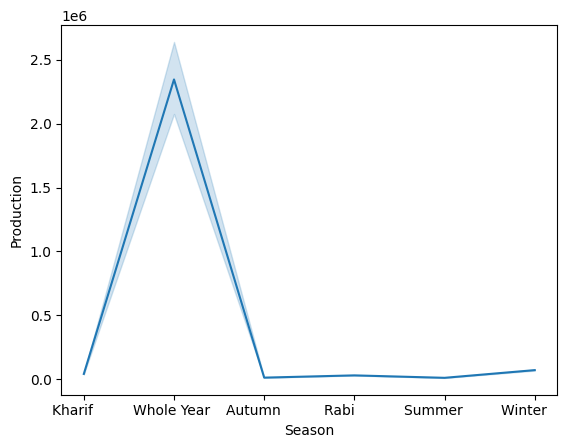

In [ ]:
#lineplot for season and production feature
sns.lineplot(x="Season",y="Production",data=df,palette='bright')

<Axes: xlabel='Season', ylabel='Production'>

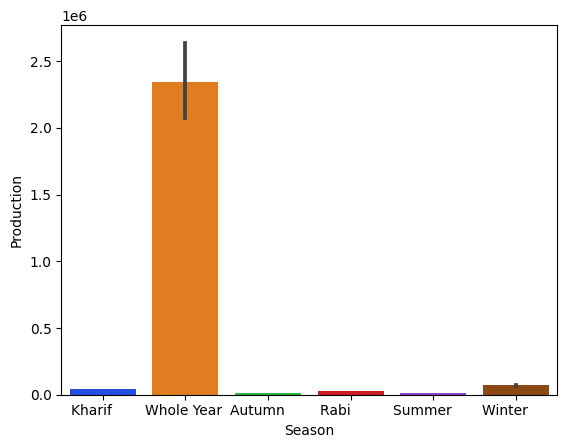

In [ ]:
#creating barplot for season and production feature
sns.barplot(x="Season",y="Production",data=df,palette='bright')

- The figure showing lineplot and barplot illustrates the production rates of crops categorized by season. 
- The production rate of year-round crops is significantly higher than that of other seasons. 
- Interestingly, the bar plot shows that despite a higher number of Kharif crops, their production rate is average, indicating that although Kharif crops offer greater diversity, their production rate is lower. 
- The same can be said for Rabi crops, which have a higher variety but a lower production rate. 
- On the other hand, Winter crops have fewer varieties, but their production rate is relatively better.






<Axes: xlabel='Season', ylabel='Area'>

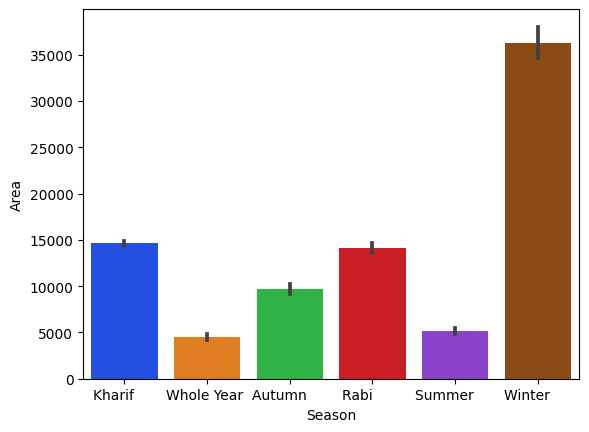

In [ ]:
# Create a barplot of season by area feature 
sns.barplot(x="Season", y="Area", data=df,palette='bright')

- The displayed visualization provides information about agricultural land areas during different seasons. 
- It can be deduced from the visualization that the winter season has the largest agricultural land area, with a value of 35,000. 
- Also, it can be inferred that the summer season has a significantly smaller agricultural land area.






## Analysis of Crop

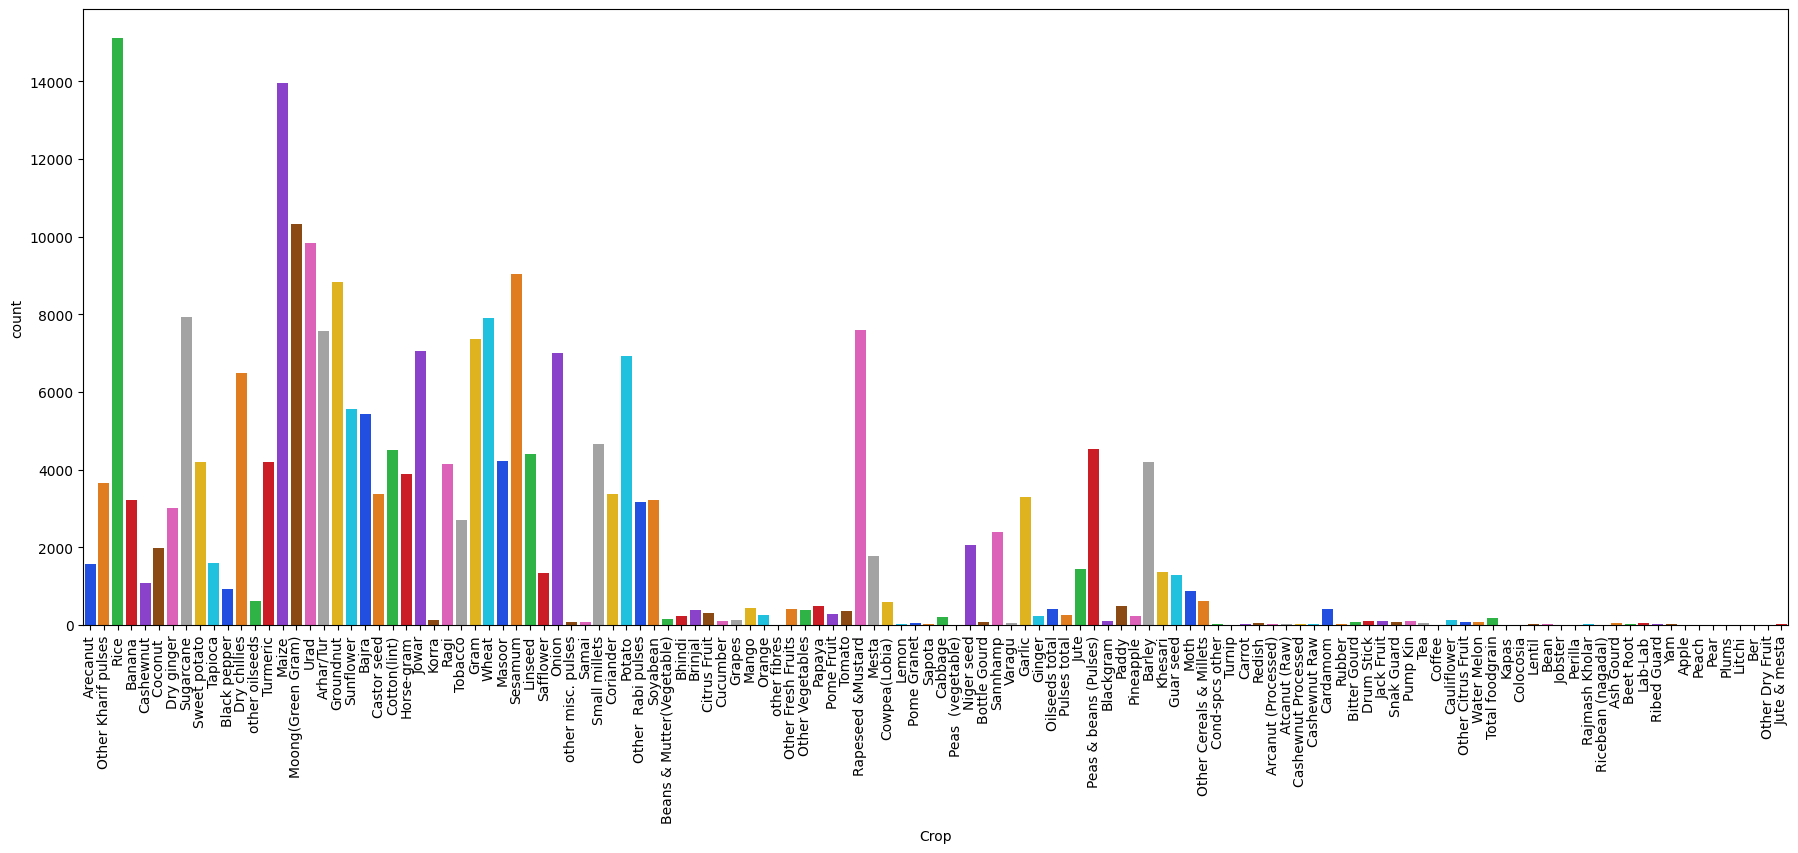

In [ ]:
plt.figure(figsize=(22,8))

# Countplot for Crop feature
sns.countplot(x='Crop', data=df,palette='bright')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Display the plot
plt.show()

- Figure presents the count plot for crop features. This shows the count of each crop present in this feature. 
- There are a total of 124 crops and  the count of few crops are: Rice is 15104, Maize is 13947, Moong(Green Gram) is 10318, Urad is 9850, Sesamum is 9046, Litchi is 6, Coffee is 6, Apple is 4, Peach is 4, Other Dry Fruit is 1, etc.


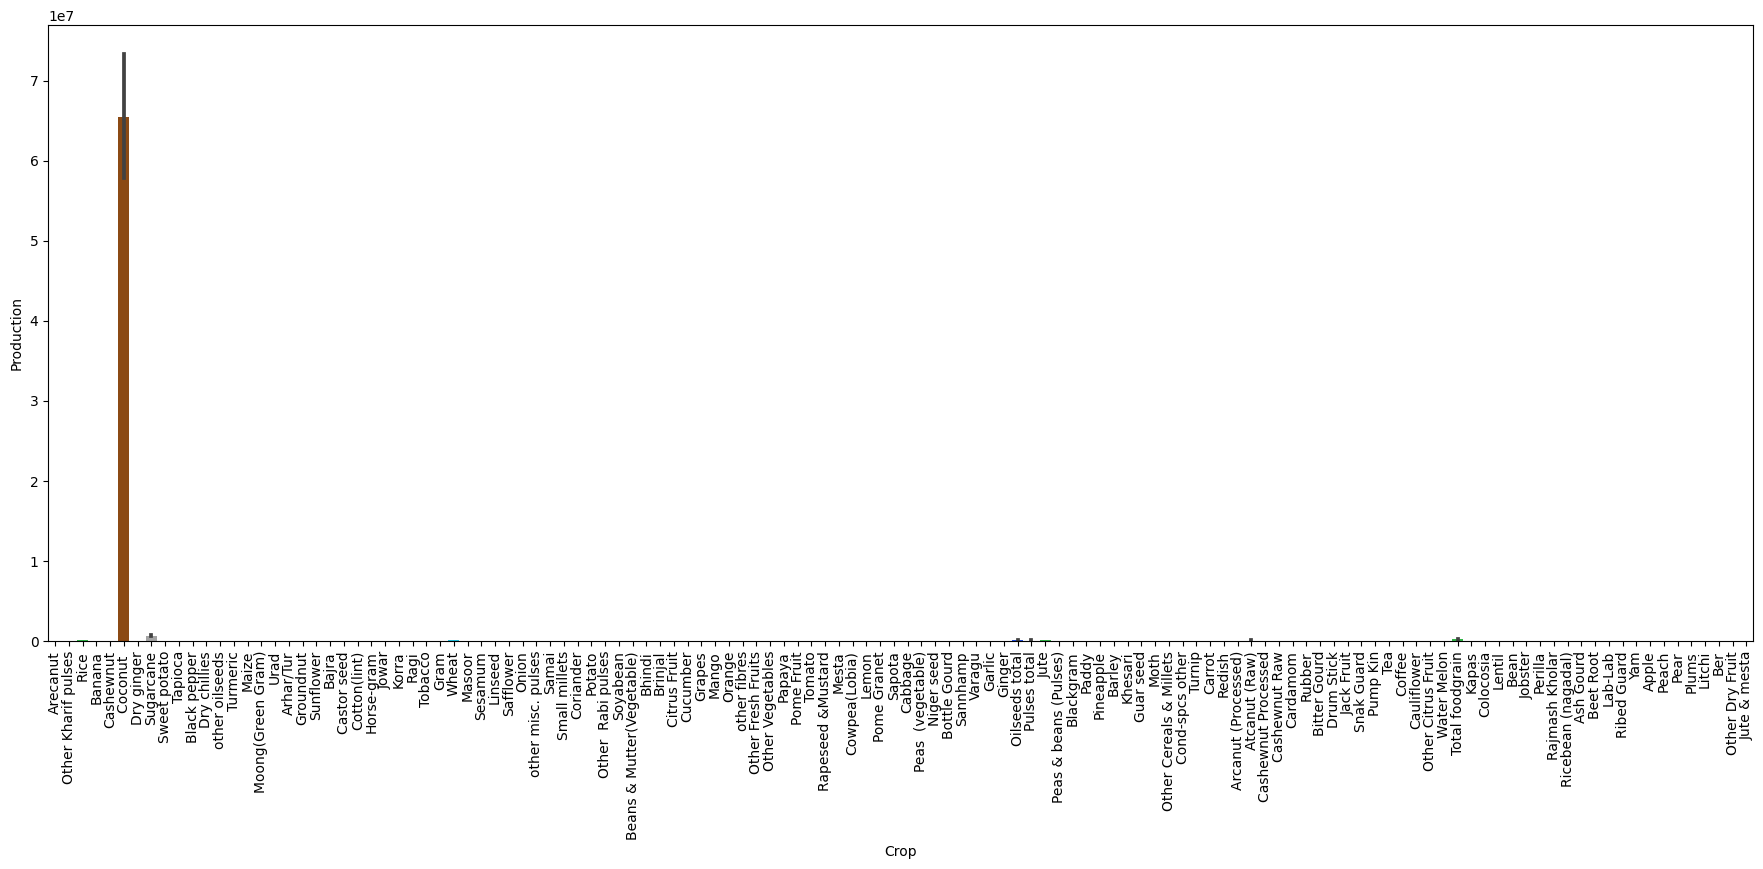

In [ ]:
plt.figure(figsize=(22,8))

# Barplot for crop and production feature
sns.barplot(x="Crop",y="Production",data=df,palette='bright')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Display the plot
plt.show()

- Based on the visualization, it can be deduced that coconut production has the highest value in comparison to other crops, while the production of sugarcane is relatively low.






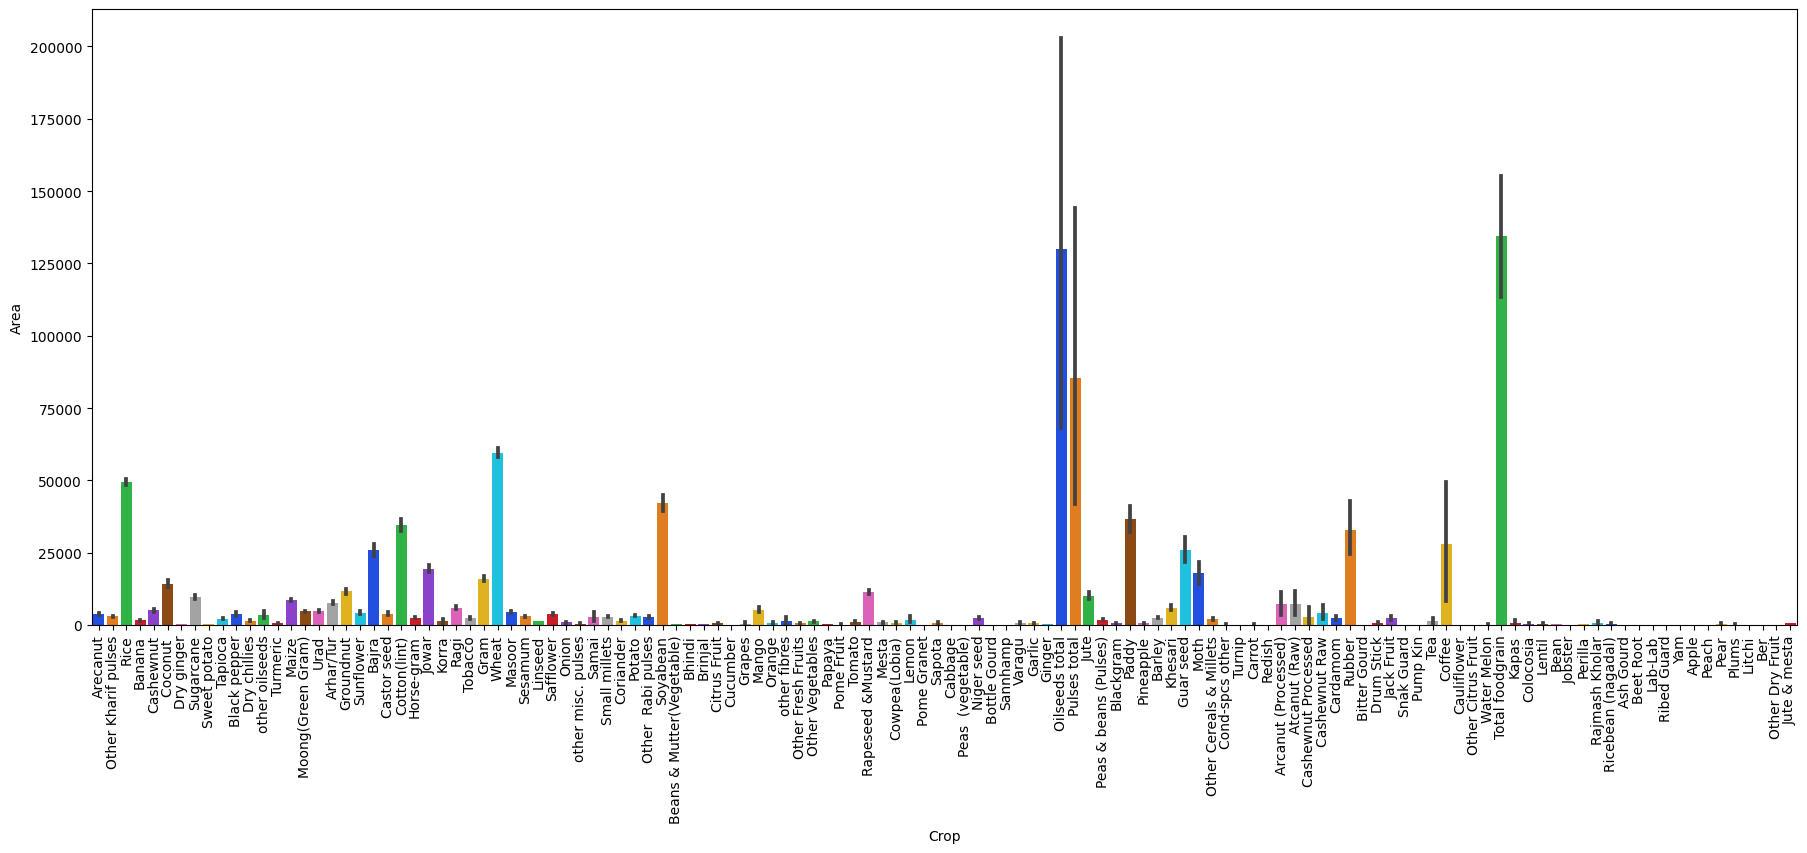

In [ ]:
plt.figure(figsize=(22,8))

# Barplot for crop and area feature
sns.barplot(x="Crop",y="Area",data=df,palette='bright')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Display the plot
plt.show()

- The presented visualization displays the allocation of agricultural land to various crops. 
- It can be inferred from the visualization that oilseeds have been allocated the highest agricultural land area, with the black line above the barplot indicating that this area may increase even further. 
- It can also be deduced that certain crops have not been allocated any agricultural land at all.






# Data Preprocessing

## Label Encoding

In [ ]:
# Encoding of the categorical features
le = LabelEncoder()
df["State_Name"] = le.fit_transform(df["State_Name"])
df["District_Name"] = le.fit_transform(df["District_Name"])
df["Season"] = le.fit_transform(df["Season"]) 
df["Crop"] = le.fit_transform(df["Crop"]) 

In [ ]:
# Viewing first five rows of the dataset
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000,1,2,1254.0,2000.0
1,0,427,2000,1,74,2.0,1.0
2,0,427,2000,1,95,102.0,321.0
3,0,427,2000,4,7,176.0,641.0
4,0,427,2000,4,22,720.0,165.0


In [ ]:
# Overview of the Dataset with its properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  int64  
 1   District_Name  246091 non-null  int64  
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  int64  
 4   Crop           246091 non-null  int64  
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 13.1 MB


## Principal Component Analysis

In [ ]:
# Dividing the data into input and output
X = df.drop('Production', axis=1)
y = df['Production']

- X will contain all the columns except for the Production column, which will be the target variable and stored in y.

- The drop() method is being used here to remove the Production column from the dataset. 
- The axis=1 parameter specifies that we want to drop the column and not the row.

- X will contain the independent variables, which are the features used to predict the target variable y, which is the dependent variable.

In [ ]:
# Dimensions of input features and output feature
X.shape,y.shape

((246091, 6), (246091,))

In [ ]:
# create a PCA object and fit it to the data
pca = PCA(n_components=4)
pca.fit(X)

PCA(n_components=4)

- Initially, there are 6 features in the input dataset, but the 4 most important features are chosen using the PCA technique. 
- This was achieved by utilising the PCA function “n_components” to reduce the dataset's dimensions to 4.

In [ ]:
# transform the data to the reduced feature space
X_pca = pca.transform(X)

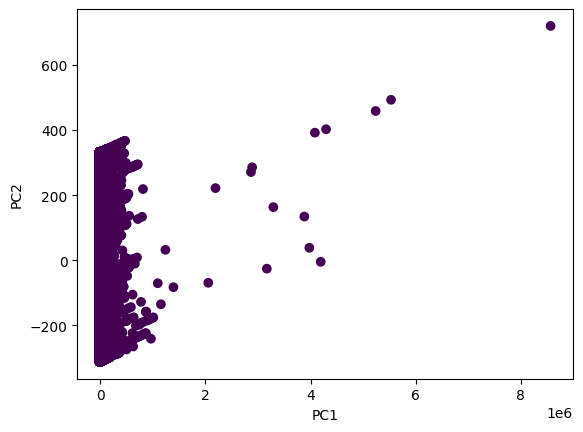

In [ ]:
# plot the data in the reduced feature space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- The scatter plot shown in Figure presents the distribution of the data in a reduced feature space, with the first principal component (PC1) on the horizontal axis and the second principal component (PC2) on the vertical axis. 
- This plot shows the analysis of insights into the distribution and degree of separation between classes. 
- The plot also tells how effectively the classes are separated in this reduced feature space.


In [ ]:
# Get the names of the original columns that correspond to the selected components (i.e., the components with the highest variance)
variance_ratios = pca.explained_variance_ratio_
component_indices = range(len(variance_ratios))
selected_feature_names = [X.columns[i] for i in component_indices]

# Print the names of the selected columns
print(selected_feature_names)

['State_Name', 'District_Name', 'Crop_Year', 'Season']


## Data Splitting

In [ ]:
# Splitting the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,random_state=8,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((172263, 4), (73828, 4), (172263,), (73828,))

- The 'test_size' parameter is set to 0.3, which means that 30% of the dataset is reserved for testing, while the remaining 70% is used for training the model. 
- The 'random_state' parameter is used to ensure that the same random split is obtained each time the code is executed, which is useful for reproducibility purposes.

# Algorithms

## Ridge Regression

In [ ]:
# create a Ridge regression object and define the hyperparameter distribution to sample from
ridge = Ridge()
param_dist = {
    'alpha': [0.1,0.5,1.0],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky']
}

In [ ]:
# Create instances of GridSearchCV for each model and run hyperparameter tuning
rd_grid_search = GridSearchCV(ridge, param_dist, cv=5, n_jobs=-1)

In [ ]:
# Fit the GridSearchCV instances to the training data
rd_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0],
                         'fit_intercept': [True, False],
                         'solver': ['auto', 'svd', 'cholesky']})

In [ ]:
# Get the best hyperparameters and evaluate the models on the test data
rd_best_params = rd_grid_search.best_params_

In [ ]:
rd_best_model = Ridge(**rd_best_params)
rd_best_model.fit(X_train, y_train)

Ridge(solver='svd')

In [ ]:
# Getting best parameters and score
rd_score = rd_best_model.score(X_test, y_test)
print("Ridge Regression best parameters:", rd_best_params)
print("Ridge Regression test score:", rd_score)

Ridge Regression best parameters: {'alpha': 1.0, 'fit_intercept': True, 'solver': 'svd'}
Ridge Regression test score: 0.003393686536367846


In [ ]:
# make predictions on the test data using the best model
y_pred = rd_best_model.predict(X_test)

In [ ]:
# mse for ridge regression model
mse = mean_squared_error(y_test, y_pred)
print('MSE: {:.5f}'.format(mse))

MSE: 301751664631947.06250


In [ ]:
# mae for ridge regression model
mae = mean_absolute_error(y_test, y_pred)
print('MAE: {:.5f}'.format(mae))

MAE: 1292388.16230


In [ ]:
# rmse for ridge regression model
rmse = sqrt(mse)
print('RMSE: {:.5f}'.format(rmse))

RMSE: 17371000.68021


In [ ]:
# r2-score for ridge regression model
r2 = r2_score(y_test, y_pred)
print('R2-SCORE: {:.5f}'.format(r2))

R2-SCORE: 0.00339


In [ ]:
# Retrieve the coefficients of the model and the corresponding feature names
coef = rd_best_model.coef_

In [ ]:
# Sort the feature names and coefficients by absolute value of coefficient
coef_abs = np.abs(coef)
sorted_indices = np.argsort(coef_abs)[::-1]
sorted_feature_names = [selected_feature_names[i] for i in sorted_indices]
sorted_coef = coef[sorted_indices]

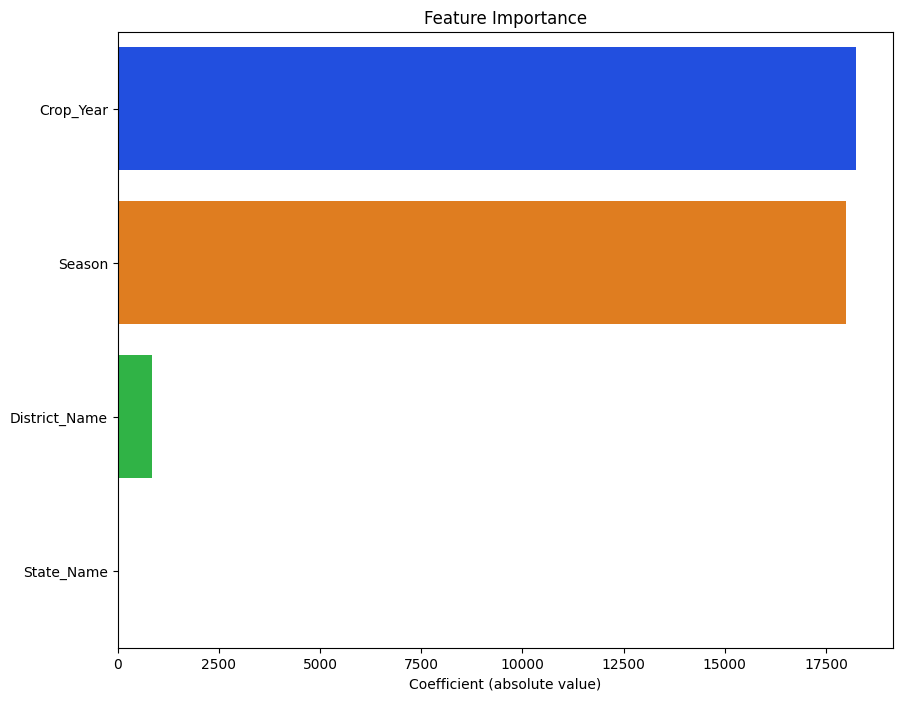

In [ ]:
# Define colors using a Seaborn color palette
n_colors = len(sorted_feature_names)
colors = sns.color_palette('bright', n_colors)

# Create horizontal bar plot of feature importance using Seaborn
plt.figure(figsize=(10,8))
sns.barplot(x=sorted_coef, y=sorted_feature_names, palette=colors)
plt.xlabel('Coefficient (absolute value)')
plt.ylabel('')
plt.title('Feature Importance')
plt.show()

- Out of the 4 attributes taken after feature selection (pca), attributes are analysed critically by the model in which the crop year is the most important for this analysis. 
- The least important is found to be state name that may have a lesser impact on crop production. 
- Season feature is also an important feature.

## Decision Tree Regressor

In [ ]:
# create a DecisionTreeRegressor object and define the hyperparameter grid to search over
tree = DecisionTreeRegressor(random_state=0)
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
}

In [ ]:
# Create instances of GridSearchCV for each model and run hyperparameter tuning
dt_grid_search = GridSearchCV(tree, param_grid, cv=5, n_jobs=-1)

In [ ]:
# Fit the GridSearchCV instances to the training data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
# Get the best hyperparameters and evaluate the models on the test data
dt_best_params = dt_grid_search.best_params_

In [ ]:
dt_best_model = DecisionTreeRegressor(**dt_best_params)
dt_best_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

In [ ]:
# Getting best parameters and score
dt_score = dt_best_model.score(X_test, y_test)
print("Decision Tree best parameters:", dt_best_params)
print("Decision Tree test score:", dt_score)

Decision Tree best parameters: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}
Decision Tree test score: 0.6965668971382091


In [ ]:
# make predictions on the test data using the best model
ypred = dt_best_model.predict(X_test)

In [ ]:
# mse for decision tree model
dt_mse = mean_squared_error(y_test, ypred)
print('MSE: {:.5f}'.format(dt_mse))

MSE: 91873232846345.45312


In [ ]:
# mae for decision tree model
dt_mae = mean_absolute_error(y_test, ypred)
print('MAE: {:.5f}'.format(dt_mae))

MAE: 419388.46614


In [ ]:
# rmse for decision tree model
dt_rmse = sqrt(dt_mse)
print('RMSE: {:.5f}'.format(dt_rmse))

RMSE: 9585052.57400


In [ ]:
# r2-score for decision tree model
dt_r2 = r2_score(y_test, ypred)
print('R2-SCORE: {:.5f}'.format(dt_r2))

R2-SCORE: 0.69657


In [ ]:
# Retrieve the feature importances of the model and the corresponding feature names
importances = dt_best_model.feature_importances_

# Sort the feature names and importances in descending order
indices = np.argsort(importances)[::-1]
sorted_feature_names = [selected_feature_names[i] for i in indices]
sorted_importances = importances[indices]

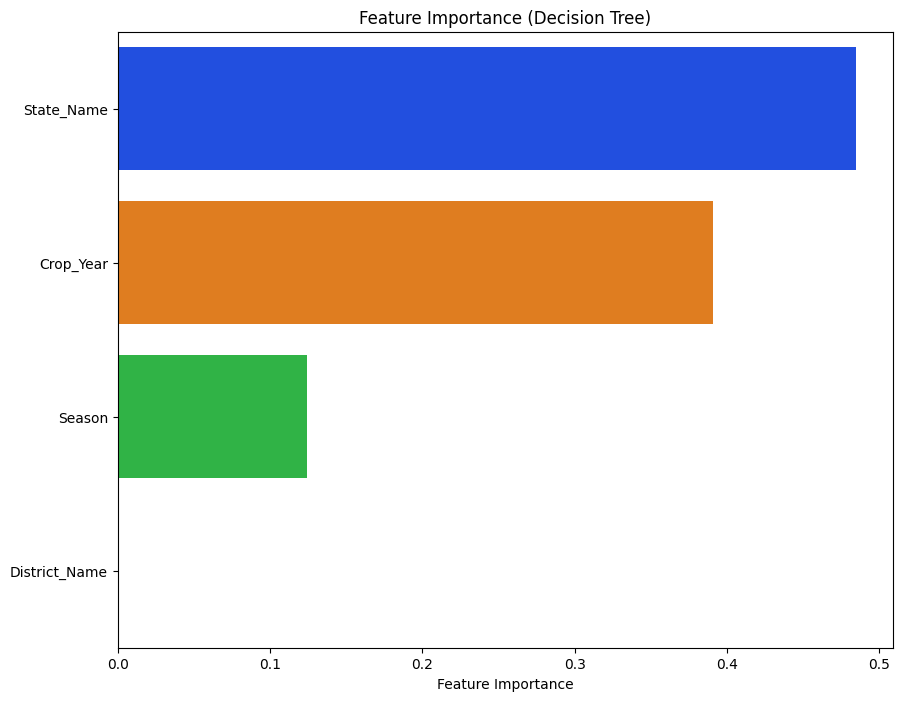

In [ ]:
# Define colors using a Seaborn color palette
n_colors = len(sorted_feature_names)
colors = sns.color_palette('bright', n_colors)

# Create horizontal bar plot of feature importance using Seaborn
plt.figure(figsize=(10,8))
sns.barplot(x=sorted_importances, y=sorted_feature_names, palette=colors)
plt.xlabel('Feature Importance')
plt.ylabel('')
plt.title('Feature Importance (Decision Tree)')
plt.show()

- Out of the 4 attributes taken after feature selection (pca), attributes are analysed critically by the decision tree model in which the State name is the most important for this analysis. 
- The least important is found to be district name that may have a lesser impact on crop production. 
- Crop year feature is also an important feature.

## Random Forest Regessor

In [ ]:
# Model 2 - Random Forest Regression
rfreg = RandomForestRegressor()
rfreg_params = {'n_estimators': [10, 20, 50], 'max_depth': [2,3,5], 'min_samples_leaf': [1, 2, 4]}

In [ ]:
# Create instances of GridSearchCV for each model and run hyperparameter tuning
rf_grid_search = GridSearchCV(rfreg, rfreg_params, cv=5, n_jobs=-1)

In [ ]:
# Fit the GridSearchCV instances to the training data
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [10, 20, 50]})

In [ ]:
# Get the best hyperparameters and evaluate the models on the test data
rf_best_params = rf_grid_search.best_params_

In [ ]:
rf_best_model = RandomForestRegressor(**rf_best_params)
rf_best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_estimators=10)

In [ ]:
# Getting best parameters and score
rf_score = rf_best_model.score(X_test, y_test)
print("Random Forest best parameters:",rf_best_params)
print("Random Forest test score:", rf_score)

Random Forest best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 10}
Random Forest test score: 0.7207802681605548


In [ ]:
# make predictions on the test data using the best model
y1pred = rf_best_model.predict(X_test)

In [ ]:
# mse calculation for random forest model
rf_mse = mean_squared_error(y_test, y1pred)
print('MSE: {:.5f}'.format(rf_mse))

MSE: 84541927682372.67188


In [ ]:
# mae calculation for random forest model
rf_mae = mean_absolute_error(y_test, y1pred)
print('MAE: {:.5f}'.format(rf_mae))

MAE: 405148.45029


In [ ]:
# rmse calculation for random forest model
rf_rmse = sqrt(rf_mse)
print('RMSE: {:.5f}'.format(rf_rmse))

RMSE: 9194668.43787


In [ ]:
# r2-score calculation for random forest model
rf_r2 = r2_score(y_test, y1pred)
print('R2-SCORE: {:.5f}'.format(rf_r2))

R2-SCORE: 0.72078


In [ ]:
# Retrieve the feature importances of the model and the corresponding feature names
importances = rf_best_model.feature_importances_

# Sort the feature names and importances in descending order
indices = np.argsort(importances)[::-1]
sorted_feature_names = [selected_feature_names[i] for i in indices]
sorted_importances = importances[indices]

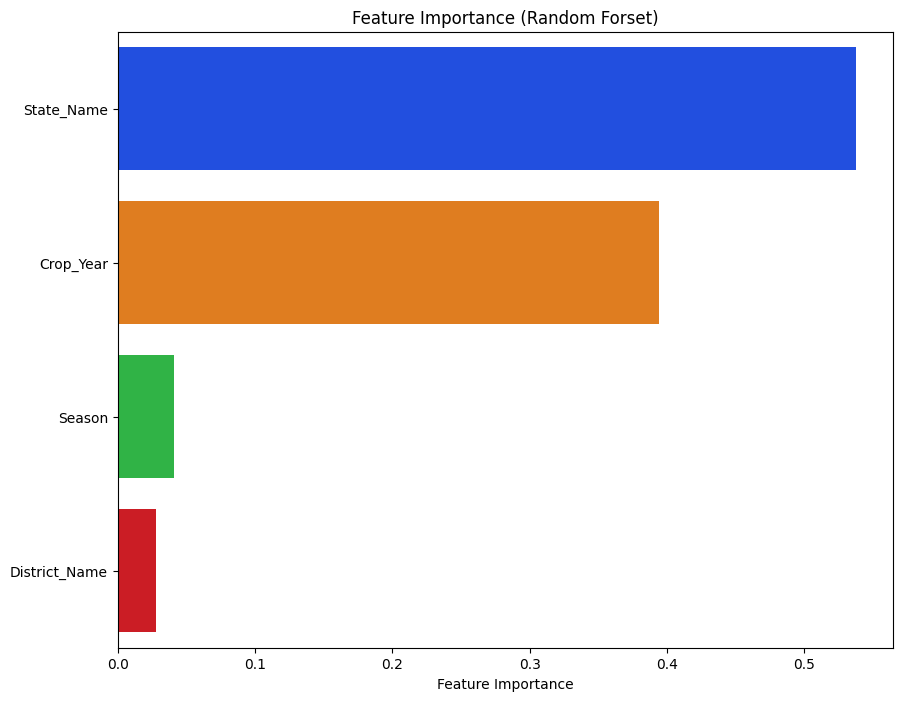

In [ ]:
# Define colors using a Seaborn color palette
n_colors = len(sorted_feature_names)
colors = sns.color_palette('bright', n_colors)

# Create horizontal bar plot of feature importance using Seaborn
plt.figure(figsize=(10,8))
sns.barplot(x=sorted_importances, y=sorted_feature_names, palette=colors)
plt.xlabel('Feature Importance')
plt.ylabel('')
plt.title('Feature Importance (Random Forset)')
plt.show()

- Out of the 4 attributes taken after feature selection (pca), attributes are analysed critically by the random forest model in which the state name is the most important for this analysis. 
- The least important is found to be district name that may have a lesser impact on crop production. 
- Crop year feature is also an important feature.

## Artificial Neural Network

In [ ]:
# Define the ANN model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

In [ ]:
# Summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


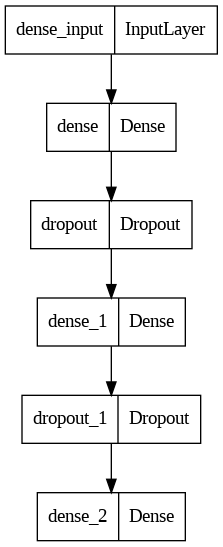

In [ ]:
# Plot of the model
from tensorflow.keras.utils import plot_model
plot_model(model,'model.png')

- In the hidden layers, the ReLU activation function is used and a dropout layer with a value of 0.2 is inserted after the first hidden layer, which consists of 64 neurons. 
- Another dropout layer with a value of 0.2 follows the third layer, which consists of 32 neurons. 
- The output layer contains a single neuron with a linear activation function that defines the regression task.

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
4307/4307 [==============================] - 23s 4ms/step - loss: 270965644722176.0000 - mae: 612465.8750 - val_loss: 315504707239936.0000 - val_mae: 765823.1875
Epoch 2/10
4307/4307 [==============================] - 12s 3ms/step - loss: 270942139842560.0000 - mae: 665916.1875 - val_loss: 315543496163328.0000 - val_mae: 708728.8125
Epoch 3/10
4307/4307 [==============================] - 8s 2ms/step - loss: 270940663447552.0000 - mae: 640771.9375 - val_loss: 315540476264448.0000 - val_mae: 709931.7500
Epoch 4/10
4307/4307 [==============================] - 10s 2ms/step - loss: 270890214359040.0000 - mae: 641154.3125 - val_loss: 315493164515328.0000 - val_mae: 760342.5625
Epoch 5/10
4307/4307 [==============================] - 11s 3ms/step - loss: 270965812494336.0000 - mae: 658880.3125 - val_loss: 315564937445376.0000 - val_mae: 701417.5625
Epoch 6/10
4307/4307 [==============================] - 9s 2ms/step - loss: 271021345079296.0000 - mae: 654390.8125 - val_loss: 31551665

In [ ]:
# Evaluate the model on the testing set
loss, mae = model.evaluate(X_test, y_test)

2308/2308 [==============================] - 5s 2ms/step - loss: 302702886125568.0000 - mae: 762531.0000


In [ ]:
# Make predictions using the trained model
y2_pred = model.predict(X_test)

2308/2308 [==============================] - 4s 2ms/step


In [ ]:
# mse calculation for ann model
a_mse = mean_squared_error(y_test, y2_pred)
print('MSE: {:.5f}'.format(a_mse))

MSE: 302703152514999.43750


In [ ]:
# mae calculation for ann model
a_mae = mean_absolute_error(y_test, y2_pred)
print('MAE: {:.5f}'.format(a_mae))

MAE: 762530.96925


In [ ]:
# rmse calculation for ann model
a_rmse = sqrt(a_mse)
print('RMSE: {:.5f}'.format(a_rmse))

RMSE: 17398366.37489


In [ ]:
# r2-score calculation for ann model
a_r2 = r2_score(y_test, y2_pred)
print('R2-SCORE: {:.5f}'.format(a_r2))

R2-SCORE: 0.00025


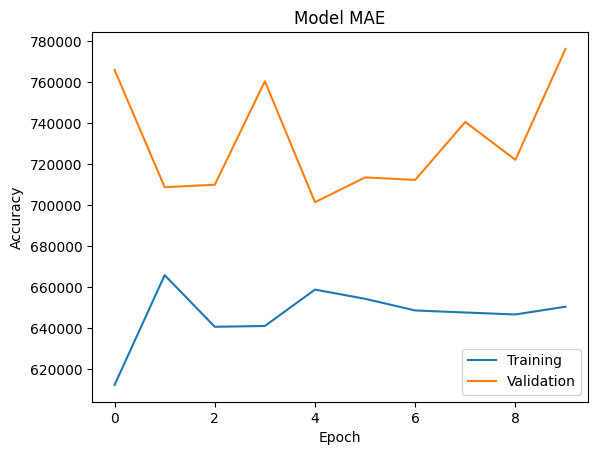

In [ ]:
# Plot the accuracy
plt.plot(history.history['mae'], label='Training')
plt.plot(history.history['val_mae'], label='Validation')
plt.title('Model MAE')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

- Training and validation MAE of ann model are neither increasing nor decreasing with the epoch. 
- That's why ANN does not learn the features properly and cannot predict the production of crop effectively.







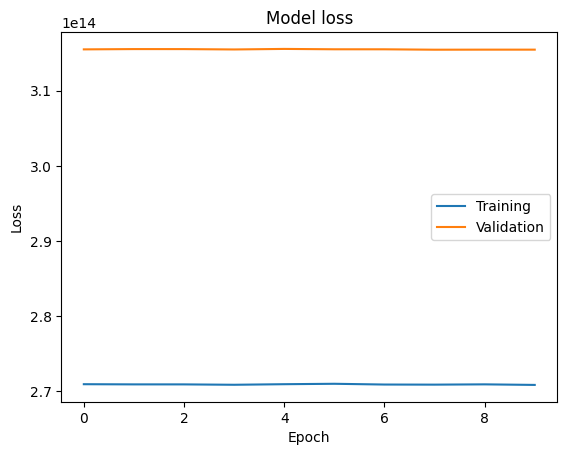

In [ ]:
# Plot the loss
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


- Plot shows that the training loss of the model is constant at lower end with each epoch value and validation loss is also constant with each epoch but at upper end of plot. 
- This means the ANN model is not accurately predicting crop production and not larning features efficiently.


# Models Comparison

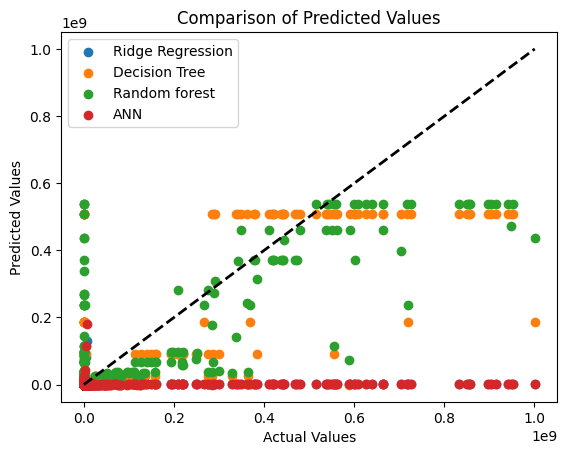

In [ ]:
# Comparison of predicted values 
plt.scatter(y_test, y_pred, label='Ridge Regression')
plt.scatter(y_test, ypred, label='Decision Tree')
plt.scatter(y_test, y1pred, label='Random forest')
plt.scatter(y_test, y2_pred, label='ANN')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted Values')
plt.legend()
plt.show()

- Figure shows the scatter plot for all four models comparing the predicted values with the actual value. 
- It shows that the ANN model and Ridge regression predicted points are almost overlapped while the Random forest model points are scattered in the plot and close to actual points.


In [ ]:
# Create a Pandas dataframe with the evaluation metrics for each model
metrics_df = pd.DataFrame({
    'Model': ['Ridge', 'Decision Tree', 'Random Forest', 'ANN'],
    'MSE': [mse, dt_mse, rf_mse, a_mse],
    'MAE': [mae, dt_mae, rf_mae, a_mae],
    'RMSE': [rmse, dt_rmse, rf_rmse, a_rmse],
    'R2-score':[r2,dt_r2,rf_r2,a_r2]})

In [ ]:
# Print the evaluation metrics for each model
metrics_df

,Model,MSE,MAE,RMSE,R2-score
0,Ridge,3.017517e+14,1.292388e+06,1.737100e+07,0.003394
1,Decision Tree,9.187323e+13,4.193885e+05,9.585053e+06,0.696567
2,Random Forest,8.454193e+13,4.051485e+05,9.194668e+06,0.720780
3,ANN,3.027032e+14,7.625310e+05,1.739837e+07,0.000251


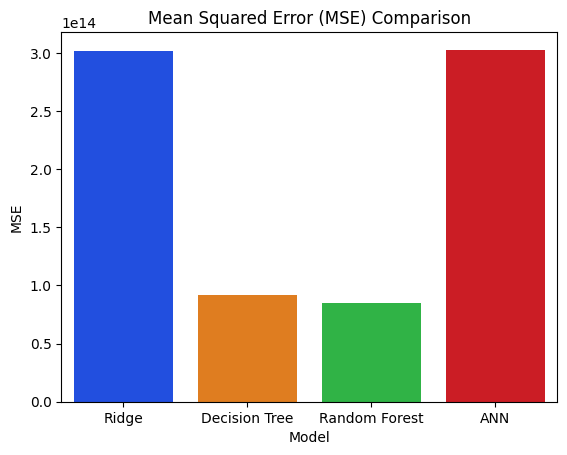

In [ ]:
# Create a bar plot of the MSE evaluation metrics for each model
sns.barplot(x='Model', y='MSE', data=metrics_df,palette='bright')
plt.title('Mean Squared Error (MSE) Comparison')
plt.show()

- MSE of all four models is compared in the figure showing that the Random forest model has the lowest MSE with a value of 84541927682372.67 while the ANN model has the highest MSE with a value of  302703152514999.43. 
- The decision tree also performs well with an MSE of 91873232846345.45.


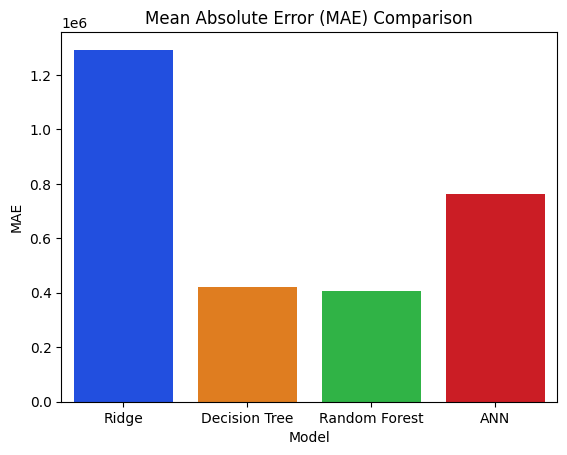

In [ ]:
# Create a bar plot of the MAE evaluation metrics for each model
sns.barplot(x='Model', y='MAE', data=metrics_df,palette='bright')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.show()


- MAE of all four models is compared in the figure showing that the Random forest model has the lowest MAE with a value of 9194668.43787 while the Ridge regression model has the highest MAE with a value of 1292388.16230. 
- The decision tree also performs well with an MAE of 419388.46614.


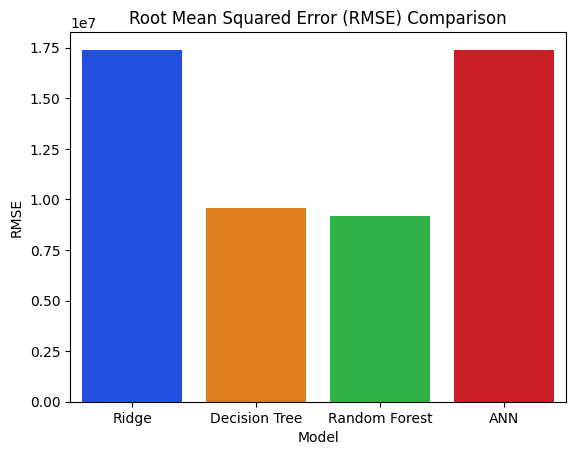

In [ ]:
# Create a bar plot of the RMSE evaluation metrics for each model
sns.barplot(x='Model', y='RMSE', data=metrics_df,palette='bright')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.show()

- RMSE of all four models is compared in the figure showing that the Random forest model has the lowest RMSE with a value of 84541927682372.67 while the ANN model has the highest RMSE with a value of  17398366.37489. 
- The decision tree also performs well with an RMSE of 9585052.57400.

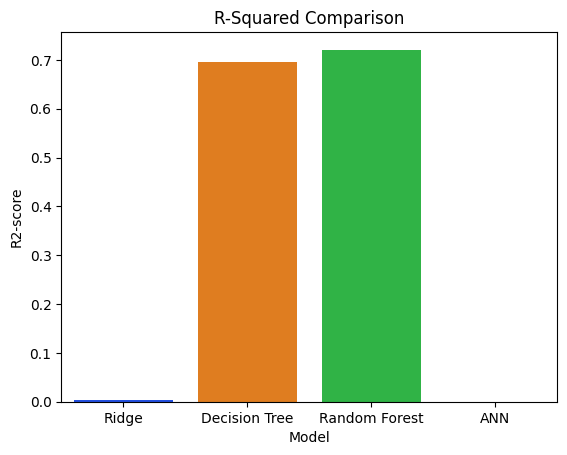

In [ ]:
# Create a bar plot of the R2 SCORE evaluation metrics for each model
sns.barplot(x='Model', y='R2-score', data=metrics_df,palette='bright')
plt.title('R-Squared Comparison')
plt.show()

- R2-Score of all four models is compared in the figure showing that the Random forest model has the highest R2-Score with a value of 0.72078 while the ANN model has the highest R2-Score with a value of  0.00025. 
- The decision tree also performs well with an R2-Score of 0.69657.


## CONCLUSION

*It is observed that the random forest model had the best performance. The ANN model, on the other hand, performed poorly, as shown by the low r2 score and the high values of MSE, and RMSE. That’s why ANN is not the right choice for this type of problem. The ridge regression model also showed unsatisfactory results and had the highest MAE value and other metrics values are also high. Both the decision tree and random forest models showed promising results, with only small differences in the metric values.*